## **FA51 - Correlation and Regression**

In [ ]:
# Import useful packages
import pandas  # For handling the dataset
import numpy as np   # For numerical operations
from scipy import stats  # For statistical functions
import matplotlib.pyplot as plt  # For visualizations

import statsmodels.api as statsmodels # useful stats package with regression functions
import seaborn as sns # very nice plotting package

# style settings
sns.set(color_codes=True, font_scale = 1.2)
sns.set_style("whitegrid")

# import data for fastfood nutritions data set
data = pandas.read_csv("fastfood.csv")

# Removing rows with missing values (NaN) from the DataFrame
data = data.dropna()

# Displaying the first 10 rows of the dataset
data.head(10)

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other
5,Mcdonalds,Big Mac,540,250,28,10.0,1.0,80,950,46,3.0,9,25.0,10.0,2.0,15.0,Other
6,Mcdonalds,Cheeseburger,300,100,12,5.0,0.5,40,680,33,2.0,7,15.0,10.0,2.0,10.0,Other
7,Mcdonalds,Classic Chicken Sandwich,510,210,24,4.0,0.0,65,1040,49,3.0,6,25.0,0.0,4.0,2.0,Other
8,Mcdonalds,Double Cheeseburger,430,190,21,11.0,1.0,85,1040,35,2.0,7,25.0,20.0,4.0,15.0,Other
9,Mcdonalds,Double Quarter Pounder® with Cheese,770,400,45,21.0,2.5,175,1290,42,3.0,10,51.0,20.0,6.0,20.0,Other


In [ ]:
# Display the number of observations left after removing missing values (NaN)
print("No. of observations:", data.shape[0])

No. of observations: 301


In [ ]:
# Calculate the correlation matrix for the DataFrame 'fastfood'
# Round the values to two decimal places
data.corr().round(2)

<ipython-input-60-9c930054f678>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().round(2)


,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
calories,1.00,0.89,0.89,0.70,0.49,0.81,0.84,0.74,0.33,0.40,0.85,-0.15,0.01,0.35
cal_fat,0.89,1.00,1.00,0.84,0.63,0.83,0.70,0.44,0.05,0.17,0.73,-0.12,-0.12,0.17
total_fat,0.89,1.00,1.00,0.84,0.63,0.83,0.70,0.44,0.05,0.17,0.73,-0.12,-0.11,0.17
sat_fat,0.70,0.84,0.84,1.00,0.82,0.73,0.47,0.28,-0.01,0.13,0.55,-0.05,-0.09,0.30
trans_fat,0.49,0.63,0.63,0.82,1.00,0.57,0.23,0.09,-0.12,0.05,0.38,-0.09,-0.14,0.11
cholesterol,0.81,0.83,0.83,0.73,0.57,1.00,0.69,0.32,-0.02,0.28,0.91,-0.06,-0.02,0.17
sodium,0.84,0.70,0.70,0.47,0.23,0.69,1.00,0.69,0.36,0.43,0.81,-0.13,0.06,0.30
total_carb,0.74,0.44,0.44,0.28,0.09,0.32,0.69,1.00,0.68,0.59,0.53,-0.19,0.13,0.51
fiber,0.33,0.05,0.05,-0.01,-0.12,-0.02,0.36,0.68,1.00,0.35,0.23,0.16,0.49,0.55
sugar,0.40,0.17,0.17,0.13,0.05,0.28,0.43,0.59,0.35,1.00,0.37,0.00,0.23,0.31


<ipython-input-61-c10b56880fdb>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr().round(2), annot=True, vmin= -1, vmax=+1, center=0, cmap='vlag')


<Axes: >

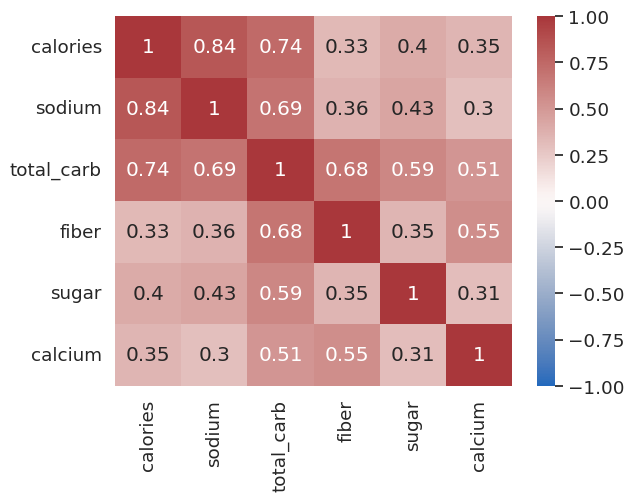

In [ ]:
#data.drop(columns=['cal_fat', 'total_fat'])
# Delete colums that have weak correalation (Pearson's r is less than 0.5) with total_carbs.
del data['cal_fat']
del data['total_fat']
del data['trans_fat']
del data['cholesterol']
del data['protein']
del data['sat_fat']
del data['vit_a']
del data['vit_c']

# Creating a heatmap of the correlation matrix for the remaining columns in 'data'
# The varibles with r > abs|0.5|
sns.heatmap(data.corr().round(2), annot=True, vmin= -1, vmax=+1, center=0, cmap='vlag')
# Some annotations were used for readability

<ipython-input-62-67bc2fa7afe4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = data.corr().round(2)


<Axes: >

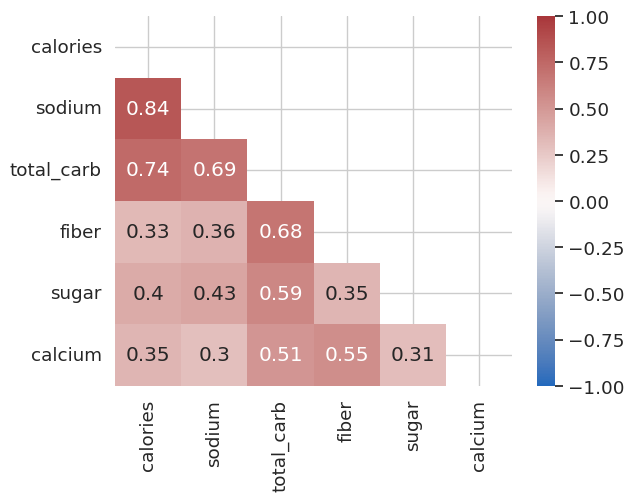

In [ ]:
matrix = data.corr().round(2)
# Mask the data to remove duplicates
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmin= -1, vmax=+1, center=0, cmap='vlag', mask = mask)

In [ ]:
# Unstacking the matrix to create a table/series
matrix = matrix.unstack()
# Printing the unstacked matrix
print(matrix)
# Print elements in the matrix with absolute values greater than 0.5
print(matrix[abs(matrix) > 0.5])


            calories  sodium  total_carb  fiber  sugar  calcium
calories        1.00    0.84        0.74   0.33   0.40     0.35
sodium          0.84    1.00        0.69   0.36   0.43     0.30
total_carb      0.74    0.69        1.00   0.68   0.59     0.51
fiber           0.33    0.36        0.68   1.00   0.35     0.55
sugar           0.40    0.43        0.59   0.35   1.00     0.31
calcium         0.35    0.30        0.51   0.55   0.31     1.00
            calories  sodium  total_carb  fiber  sugar  calcium
calories        1.00    0.84        0.74    NaN    NaN      NaN
sodium          0.84    1.00        0.69    NaN    NaN      NaN
total_carb      0.74    0.69        1.00   0.68   0.59     0.51
fiber            NaN     NaN        0.68   1.00    NaN     0.55
sugar            NaN     NaN        0.59    NaN   1.00      NaN
calcium          NaN     NaN        0.51   0.55    NaN     1.00


In [ ]:
# Code was introduced in class.
# Source of code: Forum class, Formal Analysis - FA51 Session 3 - (2.1) Regression I: Simple Regression

def regression_model(column_x, column_y):
    # this function uses built in library functions to create a scatter plot,
    # plots of the residuals, compute R-squared, and display the regression eqn

    # fit the regression line using "statsmodels" library:
    X = statsmodels.add_constant(data[column_x])
    Y = data[column_y]
    regressionmodel = statsmodels.OLS(Y,X).fit() #OLS stands for "ordinary least squares"

    # extract regression parameters from model, rounded to 3 decimal places:
    Rsquared = round(regressionmodel.rsquared,3)
    slope = round(regressionmodel.params[1],3)
    intercept = round(regressionmodel.params[0],3)

    # make plots:
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(12,4))
    sns.regplot(x=column_x, y=column_y, data=data, marker="+", ax=ax1) # scatter plot
    sns.residplot(x=column_x, y=column_y, data=data, ax=ax2) # residual plot
    ax2.set(ylabel='Residuals')
    ax2.set_ylim(min(regressionmodel.resid)-1,max(regressionmodel.resid)+1)
    plt.figure() # histogram
    sns.distplot(regressionmodel.resid, kde=False, axlabel='Residuals', color='red') # histogram

    # print the results:
    print("R-squared = ",Rsquared)
    print("Regression equation: "+column_y+" = ",slope,"* "+column_x+" + ",intercept)


<ipython-input-5-7a97c7164d89>:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(regressionmodel.resid, kde=False, axlabel='Residuals', color='red') # histogram


R-squared =  0.541
Regression equation: total_carb =  0.068 * calories +  11.034


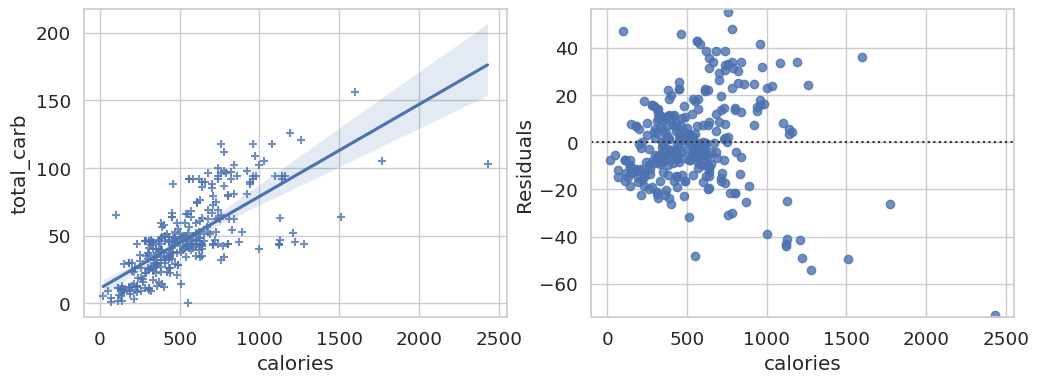

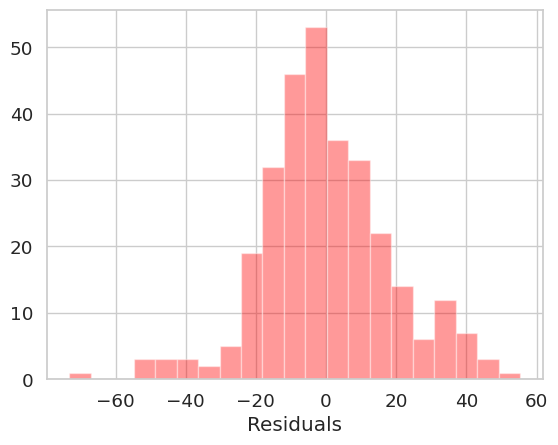

In [ ]:
# Performing regression analysis for the variables 'calories' and 'total_carb'
# Checking for Linearity, Independence, Normality, and Equal variance (LINE).
# First Predictor

regression_model('calories', 'total_carb')

<ipython-input-5-7a97c7164d89>:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(regressionmodel.resid, kde=False, axlabel='Residuals', color='red') # histogram


R-squared =  0.456
Regression equation: total_carb =  6.094 * fiber +  21.964


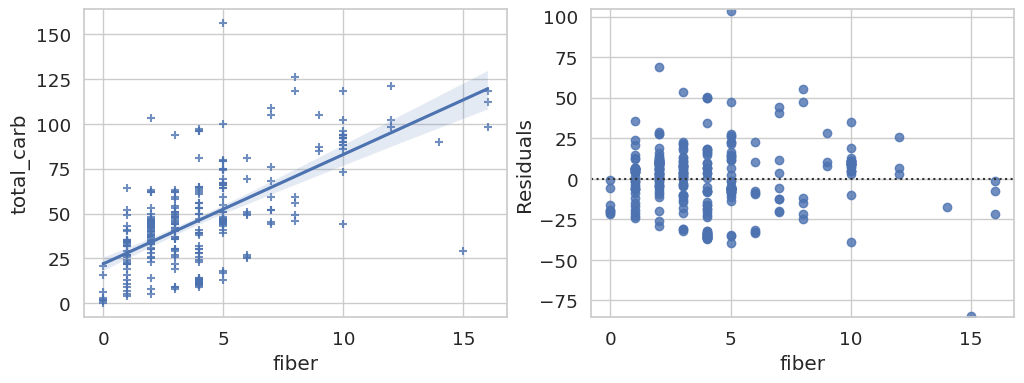

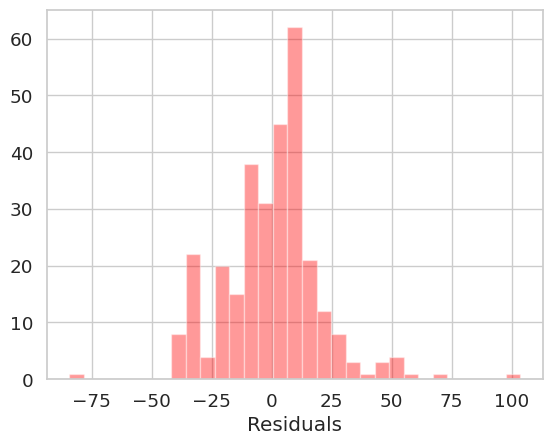

In [ ]:
# Performing regression analysis for the variables 'fiber' and 'total_carb'
# Checking for Linearity, Independence, Normality, and Equal variance (LINE).
# Second Predictor
regression_model('fiber', 'total_carb')

<ipython-input-5-7a97c7164d89>:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(regressionmodel.resid, kde=False, axlabel='Residuals', color='red') # histogram


R-squared =  0.343
Regression equation: total_carb =  2.138 * sugar +  30.057


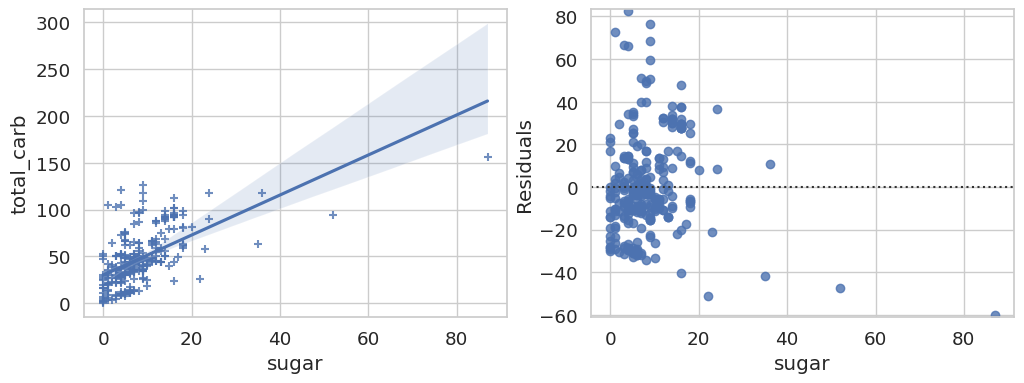

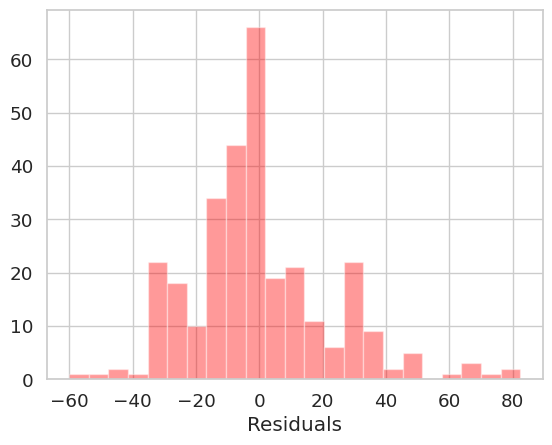

In [ ]:
# Performing regression analysis for the variables 'sugar' and 'total_carb'
# Checking for Linearity, Independence, Normality, and Equal variance (LINE).
# Third Predictor
regression_model('sugar', 'total_carb')

In [ ]:
 pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
# Code was introduced in class.
# Source of code: Forum class, Formal Analysis - FA51 Session 4 - (2.2) Regression II: Multiple Regression

# dependent variable:
Y = data['total_carb']

# subset of possible independent variables:
predictors_subset = ['calories','fiber','sugar','calcium','sodium']

# function to compute a list of adjusted R^2 values for each predictor
def Rsquared_finder(predictors_list):
    Rsquared_list = []
    for n in range(len(predictors_list[0])):
        if len(predictors_list)==1:
            X = data[predictors_list[0][n]]
        elif len(predictors_list)==2:
            X = data[[predictors_list[0][n],predictors_list[1]]]
        elif len(predictors_list)==3:
            X = data[[predictors_list[0][n],predictors_list[1],predictors_list[2]]]
        X = statsmodels.add_constant(X) # if excluded, the intercept would be 0
        model = statsmodels.OLS(Y, X).fit()
        Rsquared = model.rsquared_adj
        Rsquared_list.append(round(Rsquared,5))
    return Rsquared_list

print('Variables and functions are loaded')

Variables and functions are loaded


In [ ]:
predictor1 = str('calories')

X = data[predictor1]
X = statsmodels.add_constant(X) # if excluded, the intercept would be 0
model = statsmodels.OLS(Y, X).fit()
model.summary() # Display OLS regression results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_carb   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     352.7
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           1.62e-52
Time:                        04:36:34   Log-Likelihood:                -1307.5
No. Observations:                 301   AIC:                             2619.
Df Residuals:                     299   BIC:                             2626.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0338      2.222      4.965      0.000       6.660      15.407
calories       0.0680      0.004     18.780      0.000       0.061       0.075
==============================================================================
Omnibus:                        8.343   Durbin-Watson:                   0.884
Prob(Omnibus):                  0.015   Jarque-Bera (JB):               14.549
Skew:                           0.041   Prob(JB):                     0.000693
Kurtosis:                       4.074   Cond. No.                     1.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Adj. R-squared:	0.540

In [ ]:
predictor2 = str('fiber')
predictors_setof2 = [predictor1, predictor2]

X = data[predictors_setof2]
X = statsmodels.add_constant(X) # if excluded, the intercept would be 0
model = statsmodels.OLS(Y, X).fit()
model.summary() # Display OLS regression results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_carb   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     448.3
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           1.41e-90
Time:                        04:36:38   Log-Likelihood:                -1215.8
No. Observations:                 301   AIC:                             2438.
Df Residuals:                     298   BIC:                             2449.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6245      1.768      0.353      0.724      -2.856       4.105
calories       0.0532      0.003     18.767      0.000       0.048       0.059
fiber          4.3766      0.277     15.815      0.000       3.832       4.921
==============================================================================
Omnibus:                       11.025   Durbin-Watson:                   0.924
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               22.843
Skew:                          -0.013   Prob(JB):                     1.10e-05
Kurtosis:                       4.349   Cond. No.                     1.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Adj. R-squared:	0.749

In [ ]:
predictor3 = str("sugar")
predictors_setof3 = [predictor1, predictor2, predictor3]

X = data[predictors_setof3]
X = statsmodels.add_constant(X) # if excluded, the intercept would be 0
model = statsmodels.OLS(Y, X).fit()
model.summary() # Display OLS regression results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_carb   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     381.8
Date:                Sat, 27 Jan 2024   Prob (F-statistic):          1.47e-101
Time:                        04:37:18   Log-Likelihood:                -1186.9
No. Observations:                 301   AIC:                             2382.
Df Residuals:                     297   BIC:                             2397.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4911      1.616     -0.304      0.761      -3.671       2.688
calories       0.0463      0.003     17.031      0.000       0.041       0.052
fiber          3.8454      0.261     14.755      0.000       3.333       4.358
sugar          0.8591      0.108      7.925      0.000       0.646       1.072
==============================================================================
Omnibus:                       11.193   Durbin-Watson:                   0.799
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               23.436
Skew:                          -0.003   Prob(JB):                     8.15e-06
Kurtosis:                       4.367   Cond. No.                     1.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Adj. R-squared:	0.792

In [ ]:
# Predictor 4 will bve removed for having a strong correlation with predictor1 calories,
predictor4 = str("calcium")
predictors_setof4 = [predictor1, predictor2, predictor3, predictor4]

X = data[predictors_setof4]
X = statsmodels.add_constant(X) # if excluded, the intercept would be 0
model = statsmodels.OLS(Y, X).fit()
model.summary() # Display OLS regression results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_carb   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     287.9
Date:                Sat, 27 Jan 2024   Prob (F-statistic):          1.13e-100
Time:                        04:37:26   Log-Likelihood:                -1185.9
No. Observations:                 301   AIC:                             2382.
Df Residuals:                     296   BIC:                             2400.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4260      1.613     -0.264      0.792      -3.601       2.749
calories       0.0456      0.003     16.506      0.000       0.040       0.051
fiber          3.6532      0.293     12.473      0.000       3.077       4.230
sugar          0.8462      0.109      7.793      0.000       0.632       1.060
calcium        0.0495      0.035      1.429      0.154      -0.019       0.118
==============================================================================
Omnibus:                       10.420   Durbin-Watson:                   0.825
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               20.866
Skew:                          -0.005   Prob(JB):                     2.94e-05
Kurtosis:                       4.290   Cond. No.                     1.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Adj. R-squared: 0.793. There is not a huge increase in accounting for variability. Moreover,  "calcium" indicates a strong multicollinearity. *P-value > 0.05* significance level and *confidence interval [-0.019:0.188]* indicate that the "calcium" slope parameter includes (0).
Therefore, the first three predictors are only sufficient for our model, and "calcium" will not be part of the multiple regression model.


In [ ]:
# Code was introduced in class.
# Source of code: Forum class, Formal Analysis - FA51 Session 5 - (3.1) Synthesis: Correlation, Regression, and Statistics

def mult_regression(column_x, column_y):
    ''' this function uses built in library functions to construct a linear
    regression model with potentially multiple predictor variables. It outputs
    two plots to assess the strength of the model.'''

    # If there is only one predictor variable, plot the regression line
    if len(column_x)==1:
        plt.figure()
        sns.regplot(x=column_x[0], y=column_y, data=data, marker="+",fit_reg=True,color='orange')

    # define predictors X and response Y:
    X = data[column_x]
    X = statsmodels.add_constant(X)
    Y = data[column_y]

    # construct model:
    global regressionmodel
    regressionmodel = statsmodels.OLS(Y,X).fit() # OLS = "ordinary least squares"

    # residual plot:
    plt.figure()
    residualplot = sns.residplot(x=regressionmodel.predict(), y=regressionmodel.resid, color='green')
    residualplot.set(xlabel='Fitted values for '+column_y, ylabel='Residuals')
    residualplot.set_title('Residuals vs Fitted values',fontweight='bold',fontsize=14)

    # QQ plot:
    qqplot = statsmodels.qqplot(regressionmodel.resid,fit=True,line='45')
    qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals",fontweight='bold',fontsize=14)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_carb   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     381.8
Date:                Sat, 27 Jan 2024   Prob (F-statistic):          1.47e-101
Time:                        05:44:34   Log-Likelihood:                -1186.9
No. Observations:                 301   AIC:                             2382.
Df Residuals:                     297   BIC:                             2397.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4911      1.616     -0.304      0.761      -3.671       2.688
calories       0.0463      0.003     17.031      0.000       0.041       0.052
fiber          3.8454      0.261     14.755      0.000       3.333       4.358
sugar          0.8591      0.108      7.925      0.000       0.646       1.072
==============================================================================
Omnibus:                       11.193   Durbin-Watson:                   0.799
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               23.436
Skew:                          -0.003   Prob(JB):                     8.15e-06
Kurtosis:                       4.367   Cond. No.                     1.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

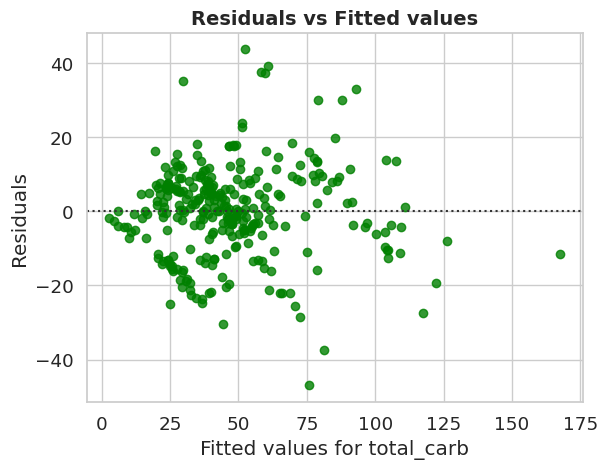

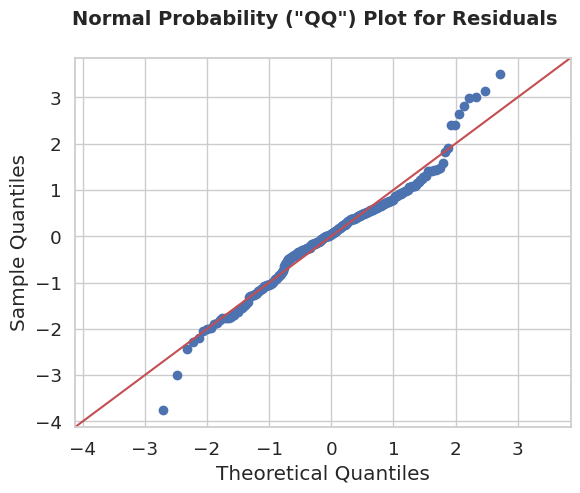

In [ ]:
mult_regression(['calories', 'fiber', 'sugar'],'total_carb')
regressionmodel.summary()

In [ ]:
# Source of code: Forum class, Formal Analysis - FA51 Session 5 - (3.1) Synthesis: Correlation, Regression, and Statistics

# print ACTUAL p-values
print("P_values:")
regressionmodel.pvalues

P_values:


const       7.613319e-01
calories    7.481091e-46
fiber       2.435443e-37
sugar       4.619671e-14
dtype: float64